<br><br>
<font size='6'><b>Convolutional Neural Networks (CNN)
</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        By Prof. Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 0. Convolution on Image

__Filter (or Kernel)__
- Modify or enhance an image by filtering
- Filter image to emphasize certain features or remove other features
- Filtering include smoothing, sharpening and edge enhancement


__Convolution in 2D__

<img src="./image_files/conv_animation.gif" width = 350>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.signal import convolve2d
from six.moves import cPickle

In [2]:
# Import image
input_image = cPickle.load(open('./image_files/input_image.pkl', 'rb'))

# Edge filter
image_filter = np.array([[-1, 0, 1]
                        ,[-1, 0, 1]
                        ,[-1, 0, 1]])

# Compute feature
feature = convolve2d(input_image, image_filter, boundary='symm', mode='same')

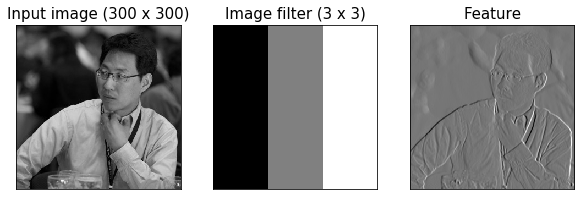

In [3]:
# Plot
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(input_image, 'gray')
ax1.set_title('Input image (300 x 300)', fontsize=15)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(image_filter, 'gray')
ax2.set_title('Image filter (3 x 3)', fontsize=15)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(feature, 'gray')
ax3.set_title('Feature', fontsize=15)
ax3.set_xticks([])
ax3.set_yticks([])
plt.show()

# 1. Convolutional Neural Networks (CNN)

__Convolutional Networks__ 
- Simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers
- Convolution can be interpreted as matrix multiplication

<br>
<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
<img src="./image_files/conv.png" width = 400>
        </td>
        <td width = 48%>
<img src="./image_files/cnn_conv.png" width = 400>
        </td>
    </tr>
</table>

## 1.1. Convolutional Operator


__Matrix multiplication__
- Every output unit interacts with every interacts unit

<img src="./image_files/M_multiplication.png" width = 400>

**Convolution**

- Local connectivity
- Weight sharing
- Typically have sparse interactions
- Accomplished by making the filter smaller than input

<img src="./image_files/conv_connect.png" width = 400>


## 1.2. Inside Convolution Layer

- First, the layer performs several convolutions to produce a set of linear activations
- Second, each linear activation is run through a nonlinear activation function
- Third, use pooling function to modify the output of the layer further
    
<img src="./image_files/conv_layer.PNG", width = 250>

# 2. CNN with TensorFlow

- MNIST example 
- Classifying hand written digits

<br>
<img src="./image_files/CNN_arch.png" width = 850>
<br>

In [4]:
%%html
<center><iframe src="https://www.youtube.com/embed/z6k_RMKExlQ?start=5150&end=6132" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

## 2.1. Import Library

In [5]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 2.2. Load MNIST Data

- Download MNIST data here : [mnist.zip](data_files/mnist.zip) 

In [6]:
from six.moves import cPickle

mnist = cPickle.load(open('./data_files/MNIST.pkl', 'rb'))
trainimgs   = mnist.train.images
trainlabels = mnist.train.labels
testimgs    = mnist.test.images
testlabels  = mnist.test.labels
n_train      = trainimgs.shape[0]
n_test       = testimgs.shape[0]
print ("Packages loaded")
print ("The number of trainimgs : {}, shape : {}".format(n_train, trainimgs.shape))
print ("The number of testimgs : {}, shape : {}".format(n_test, testimgs.shape))

Packages loaded
The number of trainimgs : 55000, shape : (55000, 784)
The number of testimgs : 10000, shape : (10000, 784)


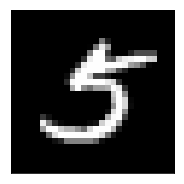

In [7]:
# Check data
sample = trainimgs[9,:].reshape(28,28)
plt.figure(figsize=(5,3))
plt.imshow(sample, 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

## 2.3. Build Model
__Convolution layers__
- First, the layer performs several convolutions to produce a set of linear activations
- Second, each linear activation is run through a nonlinear activation function
- Third, use pooling function to modify the output of the layer further

__Fully connected layers__
- Simple multi layer perceptrons

<br>
<img src="./image_files/CNN_arch.png" width = 850>
<br>

__First, the layer performs several convolutions to produce a set of linear activations__

<img src="./image_files/conv_animation.gif" width = 350>

- Filter size : $3\times3$
- Stride : The stride of the sliding window for each dimension of input
- Padding : Allow us to control the kernel width and the size of the output independently
    - 'SAME' : zero padding
    - 'VALID' : No padding

```python
conv1 = tf.nn.conv2d(x, weights['conv1_w'], 
                         strides= [1,1,1,1], 
                         padding = 'SAME')
```

- The number of channels: 2
<img src="./image_files/cnn_conv.png" width = 400>
<br>

__Second, each linear activation is run through a nonlinear activation function__

<img src="./image_files/ReLU.png" width = 500>

```python
conv1 = tf.nn.relu(conv1 + biases['conv1_b'])
```

__Third, use a pooling function to modify the output of the layer further__
- Compute a maximum value in a sliding window (max pooling)

<img src="./image_files/Max_pooling_image.jpg" width = 500>
- Pooling size : $2\times2$

- Max pooling introduces invariances
     
<img src="./image_files/max_pool.PNG" width = 450>    


```python
conv1 = tf.nn.max_pool(conv1, 
                           ksize = [1, k1_pool_height, k1_pool_width, 1], 
                           strides = [1, k1_pool_height, k1_pool_width, 1], 
                           padding ='VALID')
```

__Fully connected layer__
- Input is typically flattened features

<img src="./image_files/classification.png" width = 450>

```python
output_layer = tf.matmul(hidden, weights['output_w']) + biases['output_b']
```

## 2.4. Define a CNN Shape

In [8]:
input_height = 28
input_width = 28
input_channel = 1 # Gray scale

## First convolution layer
# Filter size
k1_height = 3
k1_width = 3
# the number of channels
k1_channel = 32
# Pooling size
k1_pool_height = 2
k1_pool_width = 2

## Second convolution layer
# Filter size
k2_height = 3
k2_width = 3
# the number of channels
k2_channel = 64
# Pooling size
k2_pool_height = 2
k2_pool_width = 2

## Fully connected
# Flatten the features
conv_result_size = int((28/(2*2)) * (28/(2*2)) * k2_channel)
n_hidden = 500
n_classes = 10

## 2.4. Define Weights, Biases and Network
- Define parameters based on predefined layer size
- Initialize with normal distribution with $\mu = 0$ and $\sigma = 0.1$

In [9]:
weights = {
    'conv1_w' : tf.Variable(tf.random_normal([k1_height, k1_width, input_channel, k1_channel],\
                                             stddev = 0.1)),
    'conv2_w' : tf.Variable(tf.random_normal([k2_height, k2_width, k1_channel, k2_channel],\
                                             stddev = 0.1)),
    'fc_w' : tf.Variable(tf.random_normal([conv_result_size, n_hidden], stddev = 0.1)),
    'output_w' : tf.Variable(tf.random_normal([n_hidden, n_classes], stddev = 0.1))
}
biases = {
    'conv1_b' : tf.Variable(tf.random_normal([k1_channel], stddev = 0.1)),
    'conv2_b' : tf.Variable(tf.random_normal([k2_channel], stddev = 0.1)),
    'fc_b' : tf.Variable(tf.random_normal([n_hidden], stddev = 0.1)),
    'output_b' : tf.Variable(tf.random_normal([n_classes], stddev = 0.1))
}

In [10]:
# Define Network
def net(x, weights, biases):
    ## First convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1_w'], 
                         strides= [1,1,1,1], 
                         padding = 'SAME')
    conv1 = tf.nn.relu(conv1 + biases['conv1_b'])
    conv1 = tf.nn.max_pool(conv1, 
                           ksize = [1, k1_pool_height, k1_pool_width, 1], 
                           strides = [1, k1_pool_height, k1_pool_width, 1], 
                           padding = 'VALID'
                           )
    
    ## Second convolution layer
    conv2 = tf.nn.conv2d(conv1, weights['conv2_w'], 
                         strides= [1,1,1,1], 
                         padding = 'SAME')
    conv2 = tf.nn.relu(conv2 + biases['conv2_b'])
    conv2 = tf.nn.max_pool(conv2, 
                           ksize = [1, k2_pool_height, k2_pool_width, 1], 
                           strides = [1, k2_pool_height, k2_pool_width, 1], 
                           padding = 'VALID')

    shape = conv2.get_shape().as_list()
    conv_result = tf.reshape(conv2, [-1, shape[1]*shape[2]*shape[3]])
    
    ### Fully connected
    hidden = tf.matmul(conv_result, weights['fc_w']) + biases['fc_b']
    hidden = tf.nn.relu(hidden)
    pred = tf.matmul(hidden, weights['output_w']) + biases['output_b']
    return pred

## 2.5. Define Loss, Initializer and Optimizer

__Loss__
- Classification: Cross entropy
    - Equivalent to apply logistic regression
$$ -\frac{1}{N}\sum_{i=1}^{N = 50}y^{(i)}\log(h_{\theta}\left(x^{(i)}\right)) + (1-y^{(i)})\log(1-h_{\theta}\left(x^{(i)}\right)) $$

__Initializer__
- Initialize all the empty variables
    
__Optimizer__
- GradientDescentOptimizer
- AdamOptimizer: the most popular optimizer
 

In [11]:
learning_rate = 0.0001
x = tf.placeholder(tf.float32, [None, input_width, input_height, input_channel])
y = tf.placeholder(tf.float32, [None, n_classes])

pred = net(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

## 2.6. Summary of Model 

<br>
<img src="./image_files/cnn_summary of model.png" width = 500>
<br>

## 2.7. Define Configuration
- Define parameters for training CNN
     - Batch size: batch size for stochastic gradient descent
     - The number of iteration: the number of training steps
     - Flag: check cost for every flag iteration

In [12]:
batch_size = 50
n_iter = 2500
flag = 250

## 2.8. Optimization

Do not run during the tutorial.

In [13]:
# Run initialize
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(n_iter):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    batch_x = np.reshape(batch_x, [-1, input_width, input_height, input_channel])
    sess.run(optimizer, feed_dict={x: batch_x,  y: batch_y})
    
    if epoch % flag == 0:
        c = sess.run(cost, feed_dict={x: batch_x,  y: batch_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 3.8983991146087646
Iter : 250
Cost : 0.40213343501091003
Iter : 500
Cost : 0.28808751702308655
Iter : 750
Cost : 0.21926389634609222
Iter : 1000
Cost : 0.19931137561798096
Iter : 1250
Cost : 0.12699322402477264
Iter : 1500
Cost : 0.04077277332544327
Iter : 1750
Cost : 0.05370693281292915
Iter : 2000
Cost : 0.07363461703062057
Iter : 2250
Cost : 0.14218874275684357


## 2.9. Test

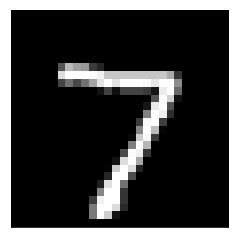

Prediction : 7
Probability : [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [14]:
test_x, test_y = mnist.test.next_batch(1)
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : test_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.imshow(test_x.reshape(28,28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision=2, suppress=True)
print('Probability : {}'.format(logits.ravel()))

# 3. Deep Learning of Things

- CNN implimented in an Embedded System

In [15]:
%%html
<center><iframe src="https://www.youtube.com/embed/baPLXhjslL8" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>